In [1]:
import tradingeconomics as te

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import os
os.chdir('..')
from helper import get_api_key

In [ ]:
te.login(get_api_key())

In [ ]:
date_now = datetime.today().strftime('%Y-%m-%d')
 
data = te.fetchMarkets(symbol=['PFE:US', 'MRNA:US','AZN:US','NVAX:US','JNJ:US'], initDate='2020-01-01', endDate= date_now, output_type='df') 

In [ ]:
raw_pfizer_data = data.loc[data['symbol'] == 'PFE:US']
raw_astrazeneca_data = data.loc[data['symbol'] == 'AZN:US']
raw_moderna_data = data.loc[data['symbol'] == 'MRNA:US']
raw_novavax_data = data.loc[data['symbol'] == 'NVAX:US']
raw_jhonson_data = data.loc[data['symbol'] == 'JNJ:US']

pfizer = raw_pfizer_data[['close']].rename(columns={'close': 'Pfizer'})
pfizer.index.name = 'Date'

astrazeneca = raw_astrazeneca_data[['close']].rename(columns={'close': 'AstraZeneca'})
astrazeneca.index.name = 'Date'

moderna = raw_moderna_data[['close']].rename(columns={'close': 'Moderna'})
moderna.index.name = 'Date'

novavax = raw_novavax_data[['close']].rename(columns={'close': 'Novavax'})
novavax.index.name = 'Date'

jhonson = raw_jhonson_data[['close']].rename(columns={'close': 'Jhonson'})
jhonson.index.name = 'Date'

df = pd.merge(pd.merge(pd.merge(pfizer,astrazeneca, on='Date'),pd.merge(moderna,novavax, on='Date'), on='Date'),jhonson, on = 'Date')

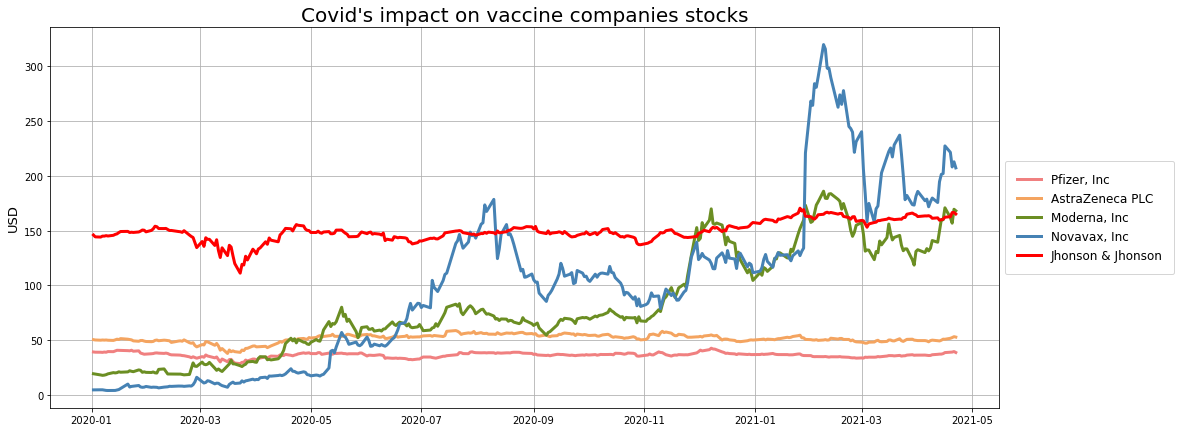

In [5]:
plt.subplots(figsize=(17, 7))

plt.plot( df.index.tolist(), df['Pfizer'].values.tolist(), color='lightcoral', linewidth=3, label="Pfizer, Inc")
plt.plot( df.index.tolist(), df['AstraZeneca'].values.tolist(), color='sandybrown', linewidth=3, label="AstraZeneca PLC")
plt.plot( df.index.tolist(), df['Moderna'].values.tolist(),  color='olivedrab', linewidth=3, label="Moderna, Inc")
plt.plot( df.index.tolist(), df['Novavax'].values.tolist(),  color='steelblue', linewidth=3, label="Novavax, Inc")
plt.plot( df.index.tolist(), df['Jhonson'].values.tolist(),  color='red', linewidth=3, label="Jhonson & Jhonson")


plt.legend(
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=12,
          ncol=1,
          title_fontsize=14,
          borderpad=1)
plt.grid(True)
plt.ylabel('USD', fontsize=13)
plt.title("Covid's impact on vaccine companies stocks", size=20)
plt.show()